# Advance Regression Assignment - Surprise Holding

## Problem Statement:

### Background: 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

### Business Goal: 
There is a requirement to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Analytical Goal: 
* A regression model using regularization in order to predict the actual value of the prospective properties and decide whether to invest in them or not
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.



### Importing the Necessary Libraries:

In [279]:
# Importing libraries

#Basic libraries
import pandas as pd   #Importing Pandas
import numpy as np    # Importing Numpy 

# handling warnings
import warnings
warnings.filterwarnings('ignore')

#Data Visualization
import matplotlib.pyplot as plt     
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import metrics

#For Statistics Operations
from scipy import stats
from scipy.stats import norm, skew 

### Data Understanding:

In [280]:
# Reading the dataset:
housing = pd.read_csv(r"C:\Users\Suhas Satheesh\Desktop\Advanced Regression Assignment\train.csv")

In [281]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [282]:
# Checking the Shape of the Dataset
housing.shape

(1460, 81)

In [283]:
# There are 1460 rows and 81 columns in the dataset

In [284]:
# Checking the details of the dataset
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [285]:
# Getting the info about the dataset
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning and Handling

In [286]:
# Checking the list of Columns in the dataframs
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [287]:
# Counting the number missing values in dataset
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [288]:
# Checking the percentage of missing values in the dataset
missing_perc =round(100*(housing.isnull().sum()/len(housing)),2).sort_values(ascending=False)
missing_perc

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

#### It is observed that the below columns have the missing data more than 80%
* PoolQC -           99.52
* MiscFeature -      96.30
* Alley -            93.77
* Fence -            80.75

In [289]:
# Let's drop the columns having more than 80% missing data

In [290]:
housing.drop(["PoolQC","MiscFeature","Alley","Fence"], axis=1, inplace=True)

In [291]:
#Checking the shape after dropping the columns
housing.shape

(1460, 77)

In [292]:
#There are 1460 rows and 77 columns

In [293]:
missing_perc =round(100*(housing.isnull().sum()/len(housing)),2).sort_values(ascending=False)
missing_perc

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
                ...  
BsmtUnfSF        0.00
TotalBsmtSF      0.00
MSSubClass       0.00
HeatingQC        0.00
SalePrice        0.00
Length: 77, dtype: float64

In [294]:
# Trating the columns having missing values

In [295]:
# Treating the missing values in FireplaceQu - Fireplace quality
housing.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### Here the following value means:
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove

In [296]:
# From the Data Dictionary Descriptions, we observe there is one more value NA	No Fireplace which is leading to missing values.

In [297]:
# Now, filling the missing values in FireplaceQu with "NA" stating No Fireplace
housing['FireplaceQu'].fillna(value='NA',inplace=True)

In [298]:
# Again checking the missing value percentage
missing_perc =round(100*(housing.isnull().sum()/len(housing)),2).sort_values(ascending=False)
missing_perc

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
                ...  
BsmtUnfSF        0.00
TotalBsmtSF      0.00
MSSubClass       0.00
HeatingQC        0.00
SalePrice        0.00
Length: 77, dtype: float64

In [299]:
# Now Treating the columns with less than 20% missing values

In [300]:
# Treating LotFrontage column
# Checking for the values in LotFrontage
housing.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [301]:
# LotFrontage means Linear feet of street connected to property

In [302]:
# So, let's fill up the missing values of LotFrontage with its mean value

In [303]:
# Finding the mean of the values of LotFrontage
mean_LotFrontage = housing.LotFrontage.mean()
mean_LotFrontage

70.04995836802665

In [304]:
# filling up the missing values of LotFrontage with its mean value
housing['LotFrontage'].fillna(mean_LotFrontage,inplace=True)

In [305]:
# Again checking the missing value percentage
missing_perc =round(100*(housing.isnull().sum()/len(housing)),2).sort_values(ascending=False)
missing_perc

GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
                ... 
BsmtUnfSF       0.00
TotalBsmtSF     0.00
MSSubClass      0.00
HeatingQC       0.00
SalePrice       0.00
Length: 77, dtype: float64

#### We have columns describing about Garage having missing values:
* GarageType -        5.55
* GarageYrBlt -       5.55
* GarageFinish -      5.55
* GarageQual -        5.55
* GarageCond -        5.55

In [306]:
# Checking the values of GarageType
housing.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [307]:
# From the Data Dictionary, we observe that the missing values might me because of the value NA	No Garage#
housing['GarageType'].fillna(value='NA',inplace=True)

In [308]:
# Checking the values of GarageFinish
housing.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [309]:
# From the Data Dictionary, we observe that the missing values might me because of the value NA	No Garage#
housing['GarageFinish'].fillna(value='NA',inplace=True)

In [310]:
# Checking the values of GarageQual
housing.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [311]:
# From the Data Dictionary, we observe that the missing values might me because of the value NA	No Garage#
housing['GarageQual'].fillna(value='NA',inplace=True)

In [312]:
# Checking the values of GarageCond
housing.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [313]:
# From the Data Dictionary, we observe that the missing values might me because of the value NA	No Garage#
housing['GarageCond'].fillna(value='NA',inplace=True)

In [314]:
# We also have a column GarageYrBlt: Year garage was built
# Let's have a look at the GarageYrBlt values
housing['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [315]:
#lets impute the missing values with the median of the numerical column
housing.GarageYrBlt.fillna(housing.GarageYrBlt.median(), inplace=True)
housing.GarageYrBlt.value_counts(normalize=True, dropna =False)

1980.0    0.065753
2005.0    0.044521
2006.0    0.040411
2004.0    0.036301
2003.0    0.034247
            ...   
1906.0    0.000685
1908.0    0.000685
1933.0    0.000685
1927.0    0.000685
1900.0    0.000685
Name: GarageYrBlt, Length: 97, dtype: float64

In [316]:
# Again checking the missing value percentage
missing_perc =round(100*(housing.isnull().sum()/len(housing)),2).sort_values(ascending=False)
missing_perc

BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtQual        2.53
BsmtCond        2.53
                ... 
BsmtUnfSF       0.00
TotalBsmtSF     0.00
MSSubClass      0.00
HeatingQC       0.00
SalePrice       0.00
Length: 77, dtype: float64

#### Now we have the colums related to description of Basement
* BsmtFinType2 -      2.60
* BsmtExposure -      2.60
* BsmtFinType1 -      2.53
* BsmtQual -          2.53
* BsmtCond -          2.53

In [317]:
# From the Data Dictionary, we observe that the missing values might me because of the value NA	No Basement
# Filling up the missing values with "NA ---> No Garage"
for i in ['BsmtExposure','BsmtQual','BsmtCond']:
    housing[i].fillna('NA',inplace=True)

In [318]:
# Checking values for BsmtFinType1'
housing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [319]:
# From the Data Dictionary, we observe that the missing values might me because of the value Unf	Unfinshed
housing['BsmtFinType1'].fillna(value='Unf',inplace=True)

In [320]:
# Checking values for BsmtFinType2
housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [321]:
# From the Data Dictionary, we observe that the missing values might me because of the value Unf	Unfinshed
housing['BsmtFinType2'].fillna(value='Unf',inplace=True)

In [322]:
# Again checking the missing value percentage
missing_perc =round(100*(housing.isnull().sum()/len(housing)),2).sort_values(ascending=False)
missing_perc

MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
BedroomAbvGr    0.00
Fireplaces      0.00
                ... 
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 77, dtype: float64

#### Treating MasVnrType & MasVnrArea
#### From the Data Dictionary MasVnrType & MasVnrArea indicate:
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet

In [323]:
# Checking the values of MasVnrType
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [324]:
# Filling the missing values with "None"
housing['MasVnrType'].fillna(value='None',inplace=True)

In [325]:
housing['MasVnrArea'].value_counts()

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [326]:
# Dropping the column 'MasVnrArea'

In [327]:
housing = housing.drop(['MasVnrArea'], axis = 1) 

In [328]:
# Again checking the missing value percentage
missing_perc =round(100*(housing.isnull().sum()/len(housing)),2).sort_values(ascending=False)
missing_perc

Electrical     0.07
Id             0.00
HalfBath       0.00
FireplaceQu    0.00
Fireplaces     0.00
               ... 
MasVnrType     0.00
Exterior2nd    0.00
Exterior1st    0.00
RoofMatl       0.00
SalePrice      0.00
Length: 76, dtype: float64

In [329]:
# Treating the column Electrical - Electrical system
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Values of Electrical means
       * SBrkr	Standard Circuit Breakers & Romex
       * FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       * FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       * FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       * Mix	Mixed

In [330]:
# So imputing the missing values with SBrkr - Standard Circuit Breaker & Romex
housing['Electrical'].fillna('SBrkr',inplace=True)

In [331]:
# Again checking the missing value percentage
missing_perc =round(100*(housing.isnull().sum()/len(housing)),2).sort_values(ascending=False)
missing_perc

Id             0.0
HalfBath       0.0
FireplaceQu    0.0
Fireplaces     0.0
Functional     0.0
              ... 
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
RoofMatl       0.0
SalePrice      0.0
Length: 76, dtype: float64

In [332]:
# Now, all the missing values are imputed and no missing values are found in the dataset

In [333]:
# Checking the Datatypes of the columns
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

### Derived Variable Creation

#### Few variables like GarageYrBlt, YearBuilt etc. show the year of construction. A better and more useful representation can be to make new variables which show the age of house, garage etc.

In [334]:
import datetime as dt
present_year =  dt.datetime.now().year
present_year

2022

In [335]:
#Finding age of construction. Building a function for it
def find_age(x):
    housing[x+"_age"] =  present_year -  housing[x]

In [336]:
find_age("YearBuilt")
find_age("GarageYrBlt")
find_age("YearRemodAdd")

In [337]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_age,GarageYrBlt_age,YearRemodAdd_age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2008,WD,Normal,208500,19,19.0,19
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,5,2007,WD,Normal,181500,46,46.0,46
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,9,2008,WD,Normal,223500,21,21.0,20
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,2,2006,WD,Abnorml,140000,107,24.0,52
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,12,2008,WD,Normal,250000,22,22.0,22


In [338]:
housing.shape

(1460, 79)

In [339]:
#dropping the old variables
housing.drop(columns = ["YearBuilt","GarageYrBlt","YearRemodAdd"], inplace=True)

#Checking shape
housing.shape

(1460, 76)

In [340]:
# Dropping the Id as it does not give any infomration
housing = housing.drop(['Id'], axis = 1) 

### Exploratory Data Analysis

In [341]:
# Identifying the Numeric Columns

In [342]:
# Checking the columns of Dataset
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorc

In [343]:
# Checking for numeric columns
numeric = housing.dtypes[housing.dtypes != "object"].index
numeric

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'YearBuilt_age', 'GarageYrBlt_age',
       'YearRemodAdd_age'],
      dtype='object')

In [344]:
# Checking for Categorical Columns
categorical  = housing.dtypes[housing.dtypes == "object"].index
categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### For Exploratory Data Analysis, SalesPrice is considered as the target/dependant variable

### Univariate Analysis of Numeric Columns

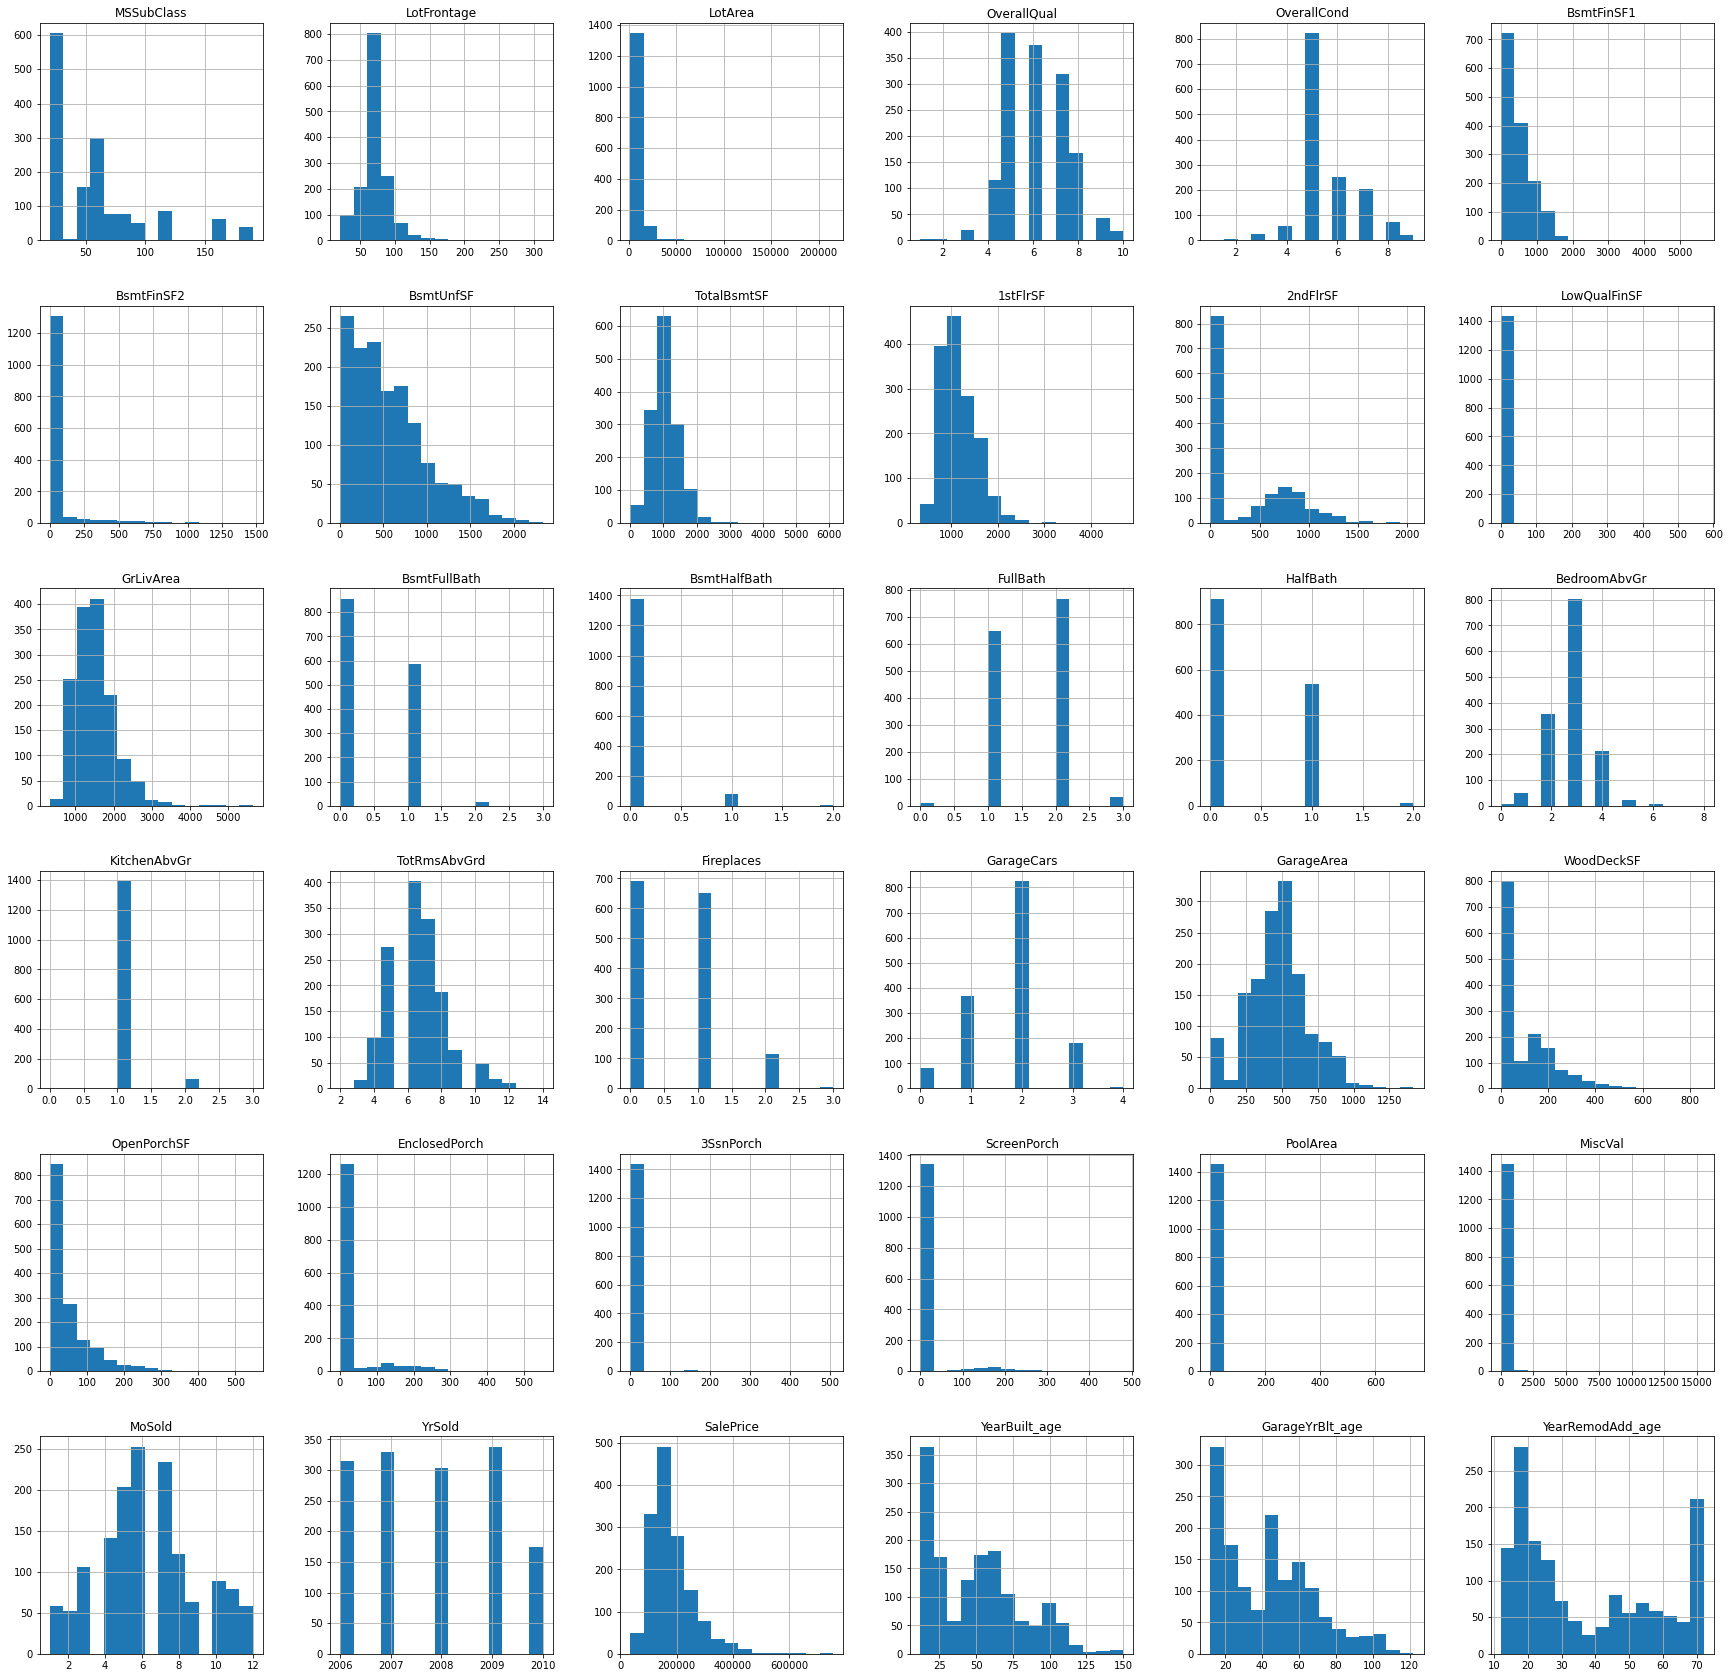

In [345]:
housing[numeric].hist(bins=15, figsize=(30, 30))
plt.show()

#### We see that few variables are highly skewed and there might be possiblity that they can be correlalted with each other. This is very difficlut to interpret from univairate analysis.¶


In [346]:
# correlation matrix
correlation = housing.corr()
correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearBuilt_age,GarageYrBlt_age,YearRemodAdd_age
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,...,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.027850,-0.081396,-0.040581
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.215828,0.043340,0.122156,0.363358,0.414266,...,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901,-0.117598,-0.062935,-0.082746
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.014228,0.025865,-0.013788
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.239666,-0.059119,0.308159,0.537808,0.476224,...,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.572323,-0.514231,-0.550684
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,...,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.375983,0.306276,-0.073741
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.249503,-0.148782,-0.128451
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.049107,0.087684,0.067759
BsmtUnfSF,-0.140759,0.122156,-0.002618,0.308159,-0.136841,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479,-0.149040,-0.185610,-0.181133
TotalBsmtSF,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581,-0.391452,-0.309386,-0.291066
1stFlrSF,-0.251758,0.414266,0.299475,0.476224,-0.144203,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852,-0.281986,-0.224897,-0.240379


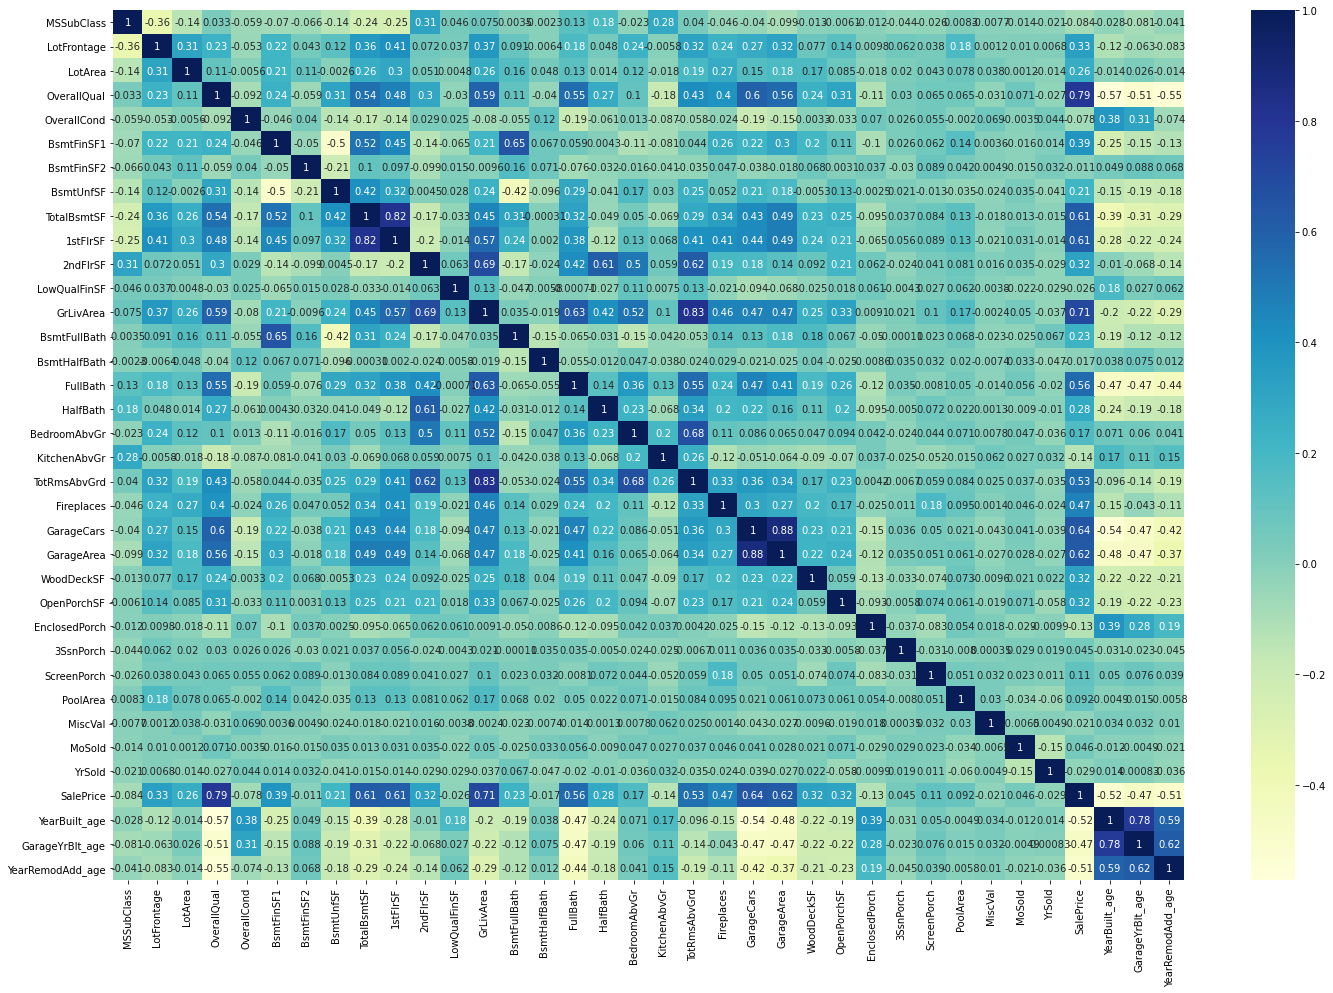

In [347]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

#### Based on the correlation we can make few following interpretions

* SalePrice is very high positively correlated to the Overall Quality(0.79)
* SalePrice is very high positively correlated to the 1stFlrSF (0.61)
* SalePrice is very high positively correlated to the TotalBsmtSF (0.61)
* SalePrice is very high positively correlated to the GrLivArea (0.71)
* SalePrice is very high positively correlated to the FullBath(0.56)
* SalePrice is very high positively correlated to the TotRmsAbvGrd(0.53)
* SalePrice is very high positively correlated to the GarageCars(0.64)
* SalePrice is very high positively correlated to the GarageAre(0.62)
* SalePrice is very high negatively correlated to the Age(-0.5)

### Bivariate Analysis

### Plot between GrLivArea - Above grade (ground) living area square feet and SalesPrice:

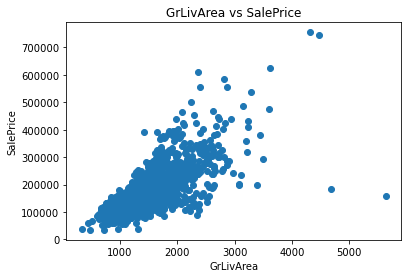

In [348]:
plt.scatter(housing.GrLivArea, housing.SalePrice)

plt.title('GrLivArea vs SalePrice')

plt.xlabel('GrLivArea')

plt.ylabel('SalePrice')

plt.show()

### Observation:
* It is observed that as the GrLivArea increases, Sales Price increases.
* Most of the plots are found between 500 to 2500 sq feet.

In [349]:
# Bivariate Analysis of Various Numeric columns

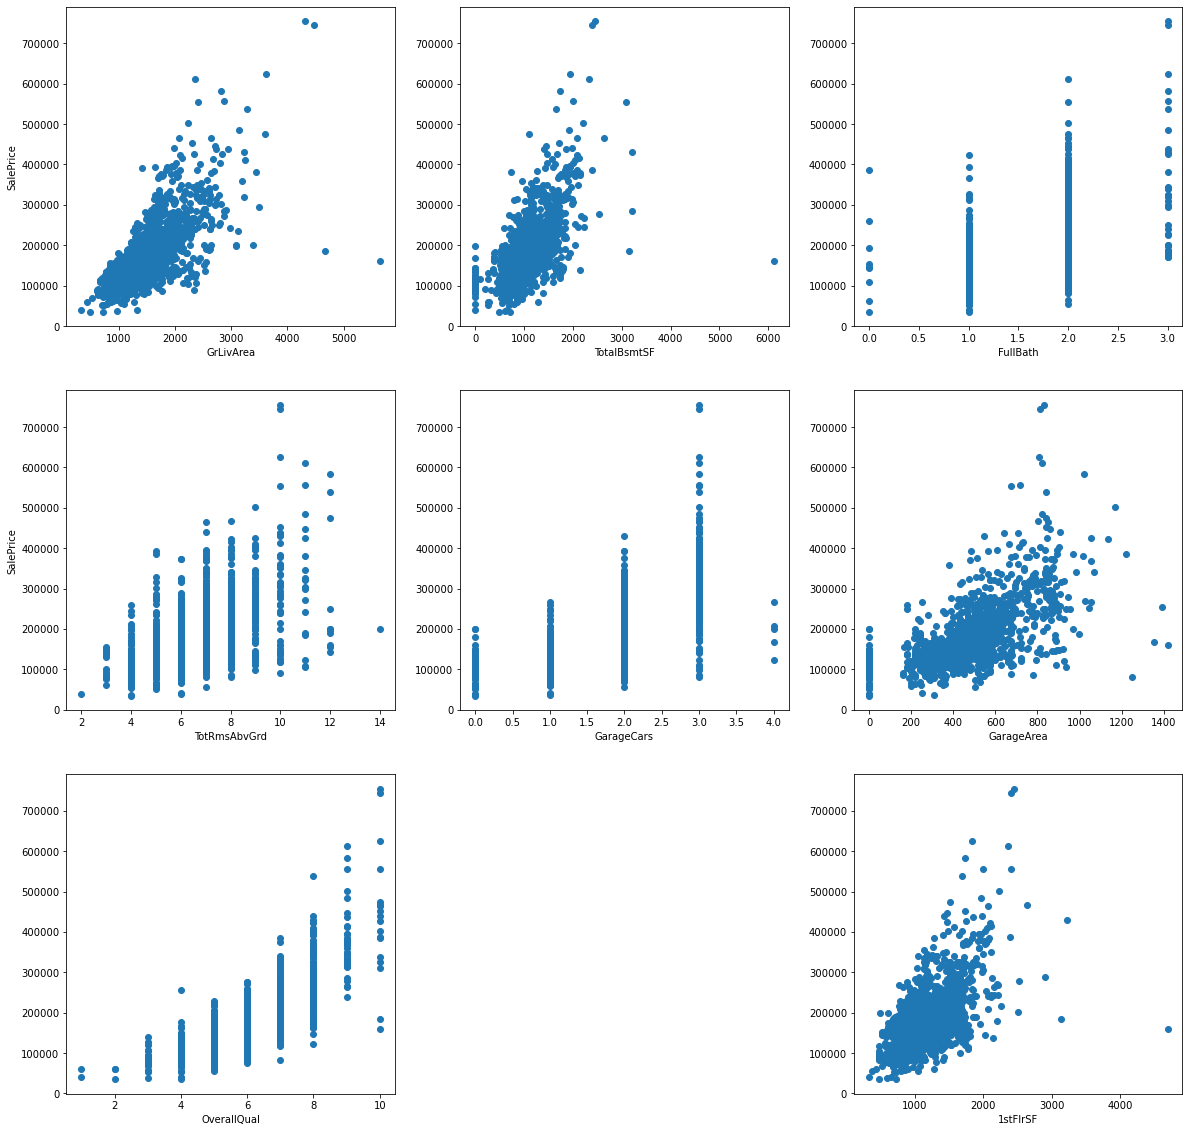

In [350]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(housing.GrLivArea, housing.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(housing.TotalBsmtSF, housing.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(housing.FullBath, housing.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(housing.TotRmsAbvGrd, housing.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(housing.GarageCars, housing.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(housing.GarageArea, housing.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(housing.OverallQual, housing.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)
plt.scatter(housing['1stFlrSF'], housing.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

### Observations:
* We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
* We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to theie characteritics.

### For Categorical Variables:

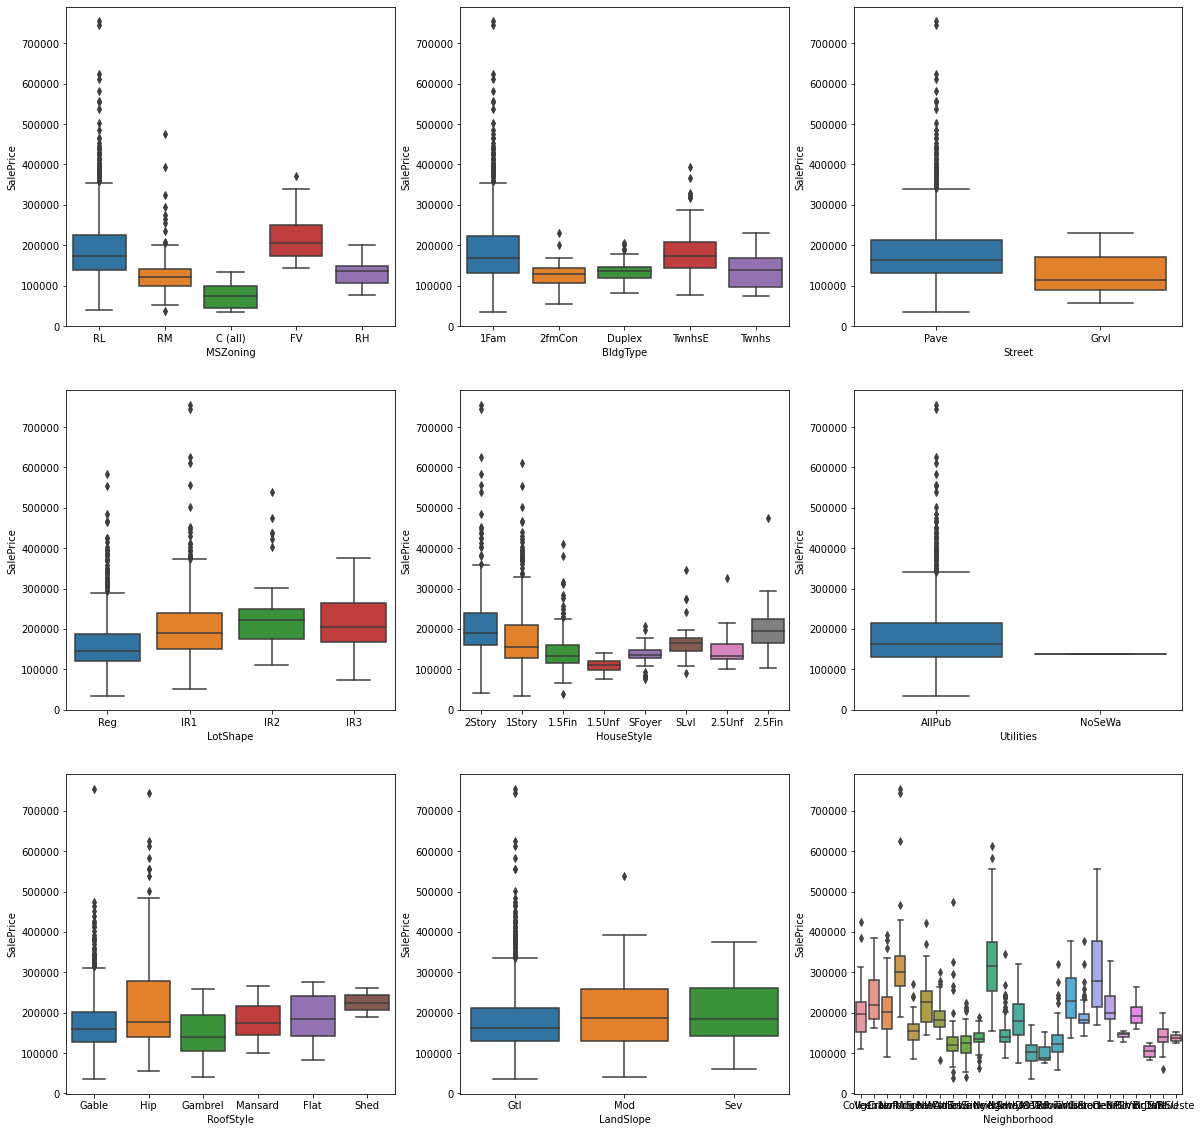

In [351]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=housing)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=housing)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=housing)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=housing)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=housing)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=housing)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=housing)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=housing)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=housing)
plt.show()


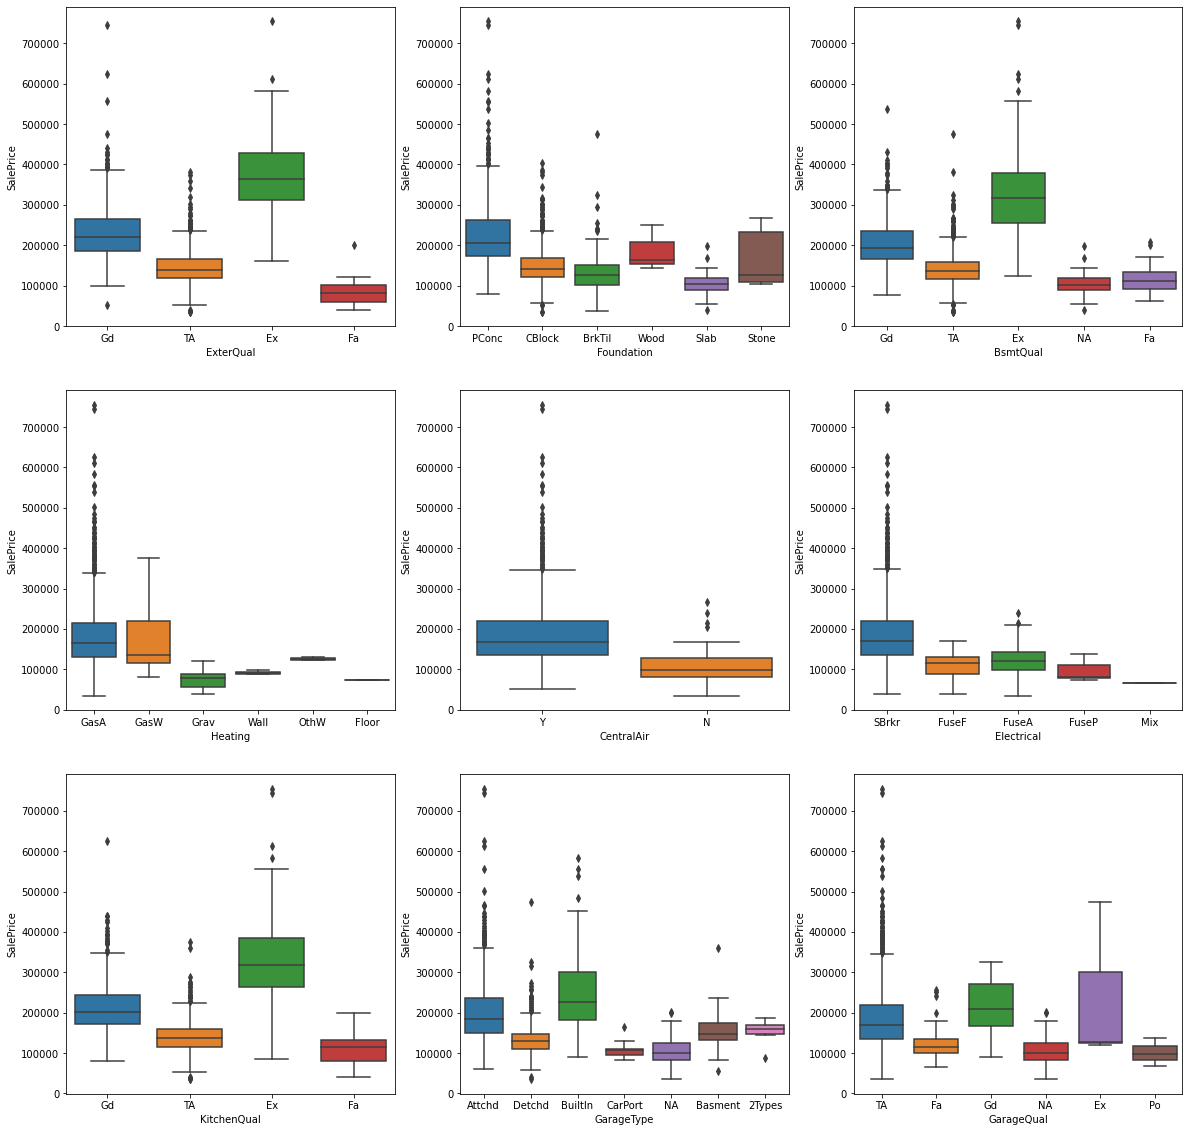

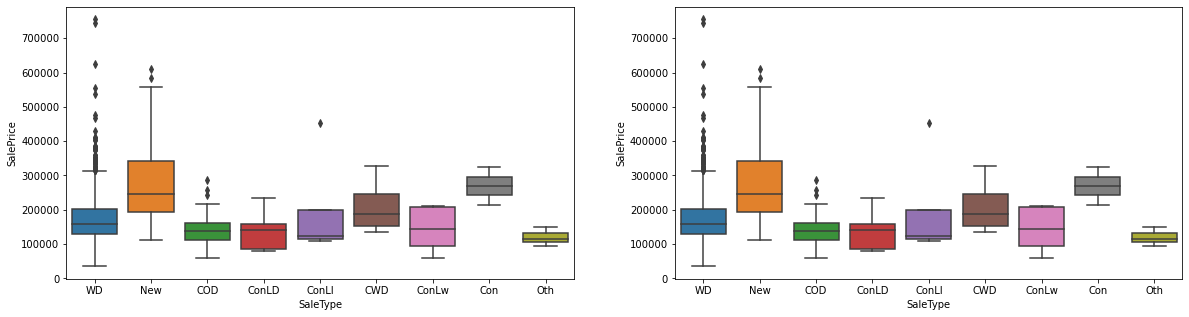

In [352]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=housing)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=housing)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=housing)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=housing)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=housing)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=housing)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=housing)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=housing)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=housing)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=housing)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=housing)
plt.show()

### Observations:
- MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
- The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
- The utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
- The house with Exterior Quality of type Execellent has the highest SalePrice.
- The house with Basement Quality of type Execellent has the highest SalePrice.
- The house with Kitchen Quality of type Execellent has the highest SalePrice.
- The house with Garage Quality of type Execellent has the highest SalePrice.
- The house with Garage Type of type BuiltIn has the highest SalePrice.
- The house with Sale Type of type New has the highest SalePrice.
- The Central air of type 'Yes' has more Sale Price when compared to 'No'

### Data Preprocessing - Tranforming the Target variable(SalePrice)


In [353]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

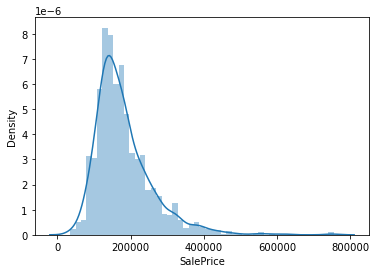

In [354]:
#Checking the distribution of dependent variable
sns.distplot(housing["SalePrice"])

plt.show()

### Since SalePrice variable is highly skewed let's transform it (log transformation) and check for it's distribution.


In [355]:
housing["SalePrice_log"] =  np.log(housing["SalePrice"])

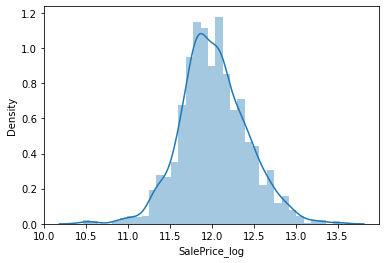

In [356]:
#Checking the distribution of dependent variable now
sns.distplot(housing["SalePrice_log"])
plt.show()

In [357]:
# We notice that the dependent variable now has a close to normal distribution. We can go ahead with further analysis.


In [358]:
#Removing the non-log form of dependent variable
housing.drop(columns = ["SalePrice"])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearBuilt_age,GarageYrBlt_age,YearRemodAdd_age,SalePrice_log
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,19,19.0,19,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,46,46.0,46,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,21,21.0,20,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,107,24.0,52,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,22,22.0,22,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,23,23.0,22,12.072541
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,44,44.0,34,12.254863
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,81,81.0,16,12.493130
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,72,72.0,26,11.864462


In [359]:
housing.shape

(1460, 76)

### Data Preprocessing - Manual Encoding few categorical variables


In [360]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

housing['ExterQual'] = housing[['ExterQual']].apply(map_function)
housing['ExterCond'] = housing[['ExterCond']].apply(map_function)
housing['BsmtQual'] = housing[['BsmtQual']].apply(map_function)
housing['BsmtCond'] = housing[['BsmtCond']].apply(map_function)
housing['BsmtExposure'] = housing[['BsmtExposure']].apply(map_function1)
housing['BsmtFinType1'] = housing[['BsmtFinType1']].apply(map_function2)
housing['BsmtFinType2'] = housing[['BsmtFinType2']].apply(map_function2)
housing['HeatingQC'] = housing[['HeatingQC']].apply(map_function)
housing['CentralAir'] = housing[['CentralAir']].apply(map_function3)
housing['KitchenQual'] = housing[['KitchenQual']].apply(map_function)
housing['Functional'] = housing[['Functional']].apply(map_function4)
housing['GarageFinish'] = housing[['GarageFinish']].apply(map_function5)
housing['GarageQual'] = housing[['GarageQual']].apply(map_function)
housing['GarageCond'] = housing[['GarageCond']].apply(map_function)
housing['PavedDrive'] = housing[['PavedDrive']].apply(map_function6)

In [361]:
# converting the columns MSSubClass as categorical as it is a categorical col and not numerical
housing['MSSubClass']=housing['MSSubClass'].astype('object')

In [362]:
# Creating dummies for Categorical Variables
dummy = pd.get_dummies(housing[['MSZoning', 'MSSubClass', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4,3,4,3,1,6,1,5,1,4,...,0,0,0,0,1,0,0,0,1,0
1,3,3,4,3,4,5,1,5,1,3,...,0,0,0,0,1,0,0,0,1,0
2,4,3,4,3,2,6,1,5,1,4,...,0,0,0,0,1,0,0,0,1,0
3,3,3,3,4,1,5,1,4,1,4,...,0,0,0,0,1,0,0,0,0,0
4,4,3,4,3,3,6,1,5,1,4,...,0,0,0,0,1,0,0,0,1,0


In [363]:
# Adding the results back to the cleaned dataframe
housing = pd.concat([housing, dummy], axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [364]:
# Dropping the columns whose dummies have been created
housing=housing.drop(['MSZoning', 'MSSubClass', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], axis = 1)

In [365]:
housing.shape

(1460, 200)

In [366]:
#Final check of missing values 
Total_missing = housing.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing.isnull().sum()/housing.shape[0]).sort_values(ascending = False)
housing_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
housing_missing_values

,Total_missing_values,Percent_missing_values
LotFrontage,0,0.0
Exterior1st_MetalSd,0,0.0
RoofMatl_Tar&Grv,0,0.0
RoofMatl_WdShake,0,0.0
RoofMatl_WdShngl,0,0.0
...,...,...
Neighborhood_BrDale,0,0.0
Neighborhood_BrkSide,0,0.0
Neighborhood_ClearCr,0,0.0
Neighborhood_CollgCr,0,0.0


### Data Modeling -Test Train spliting

In [367]:
data_train, data_test = train_test_split(housing, train_size=0.7, random_state=100)

### Making model using Multiple Regression

In [368]:
# Splitting the Training data to x_train and y_train
y_train = data_train.pop("SalePrice_log")
x_train = data_train

In [369]:
#Fitting line using x_train and y_train

In [370]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(x_train, y_train)


LinearRegression()

In [371]:
print("Y Intercept " + str(lm.intercept_))
print("Coefficents ")
print(lm.coef_)

Y Intercept 15.162614433515992
Coefficents 
[ 9.09179324e-05  1.14600696e-06  1.61770494e-02  2.44713734e-02
  2.19671644e-05  1.01262013e-05  1.34440922e-06  3.34372957e-05
  3.65820306e-05 -2.42446049e-05  2.99540440e-05  4.22915279e-05
  2.09564942e-02  4.31054408e-03  1.69732656e-02  2.33358088e-02
  1.41213628e-02 -3.91059864e-02  1.68920924e-03 -1.23142328e-02
  2.77985244e-03  8.30739290e-05  5.75061205e-05  9.14368301e-07
  1.34284211e-04  6.05746804e-05  9.99900036e-05 -1.33935951e-04
 -2.15122120e-06  4.95525076e-04 -2.95892052e-03  2.78918325e-06
 -1.20812732e-03 -1.24887425e-04 -7.97181593e-04  4.10570315e-01
  3.79144902e-01  3.82380088e-01  3.32104921e-01 -1.06557340e-01
 -1.26318821e-01 -2.21621161e-01 -9.57453948e-03 -5.53299753e-02
 -8.72238891e-04 -4.88238797e-02 -3.25213009e-02  2.97449658e-02
  1.24940013e-02 -2.82252074e-02 -1.41349423e-01 -7.29449707e-02
 -2.57066745e-02  3.85042603e-02  1.08457813e-02 -1.26145806e-02
  1.81362534e-03 -1.31551831e-02  1.71954734e-

In [372]:
# Spliting Training to x_test and y_test
y_test = data_test.pop("SalePrice_log")
x_test = data_test

In [373]:
# Creating function to display R2 (R-Squared) RSS (Residual Sum of Squared) and MSE (Mean Squared Error)
def displayR2_RSS_MSE(y_pred_train, y_pred_test):
    metric = []
    
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R2_Train : " + str(r2_train_lr))
    metric.append(r2_train_lr)
    
    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2_Test : " + str(r2_test_lr))
    metric.append(r2_test_lr)
    
    print(" ")
    
    rss_train_lr = np.sum(np.square(y_train - y_pred_train))
    print("RSS_Train : " + str(rss_train_lr))
    metric.append(rss_train_lr)
    
    rss_test_lr = np.sum(np.square(y_test - y_pred_test))
    print("RSS_Test : " + str(rss_test_lr))
    metric.append(rss_test_lr)
    
    print(" ")
    
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("MSE_Train : " + str(mse_train_lr))
    metric.append(mse_train_lr)
    
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("MSE_Test : " + str(mse_test_lr))
    metric.append(mse_test_lr)
    
    return metric

In [374]:
# Prediction Using Multiple Linear Regression
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

metric_lr = displayR2_RSS_MSE(y_pred_train, y_pred_test)

R2_Train : 0.9744520947136281
R2_Test : 0.9435016687870156
 
RSS_Train : 4.099018261092075
RSS_Test : 4.087862547413042
 
MSE_Train : 0.004014709364438859
MSE_Test : 0.009311759789095769


#### As we can see model is clearly overfitted, To solve this problem we will use now regularisation techniques called Ridge and Lasso Regression One By One.

### Observation:
* R2 Score for Train data: 97.4%
* R2 Score for Test data: 94.3%

### Ridge Regression:

In [376]:
#Using GridSearchCV - we try to run multiple ridge regression models and look for the best alpha value

#list of alphas
param_grid =  {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                       9.0, 10.0, 20.0, 50.0, 100.0]}

folds = 5 #Using a 5-fold cross validation

ridge = Ridge() #Instantiating

#GridSearchCV
model_rdg = GridSearchCV(estimator = ridge,
                        cv = folds,
                        param_grid = param_grid,
                        scoring = "r2",
                        return_train_score = True,
                        verbose = 1)

model_rdg.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [377]:
cv_out = pd.DataFrame(model_rdg.cv_results_)
cv_out.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124529,0.222389,0.005717,0.005240,0.001,{'alpha': 0.001},0.953279,0.926873,0.933290,0.920616,...,0.934926,0.011322,24,0.975683,0.976664,0.976723,0.976160,0.977027,0.976452,0.000474
1,0.013430,0.001790,0.002819,0.002323,0.01,{'alpha': 0.01},0.953118,0.927473,0.935241,0.926995,...,0.936938,0.009771,23,0.975597,0.976651,0.976643,0.976116,0.976945,0.976390,0.000478
2,0.008359,0.007791,0.005717,0.005240,0.1,{'alpha': 0.1},0.952761,0.930616,0.940025,0.939256,...,0.941732,0.007383,22,0.974778,0.976286,0.975795,0.975508,0.975969,0.975667,0.000511
3,0.012876,0.002531,0.002572,0.002135,0.2,{'alpha': 0.2},0.953190,0.932851,0.941558,0.943180,...,0.943576,0.006695,20,0.974290,0.975858,0.975269,0.975058,0.975367,0.975168,0.000512
4,0.011370,0.001017,0.004388,0.000797,0.3,{'alpha': 0.3},0.953598,0.934502,0.942334,0.945821,...,0.944757,0.006293,19,0.973919,0.975464,0.974878,0.974670,0.974944,0.974775,0.000501


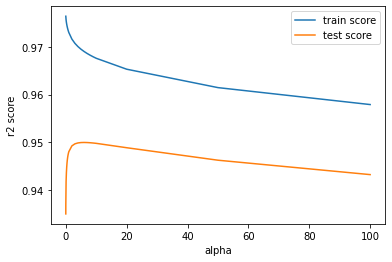

In [379]:
#plot the scores
cv_out['param_alpha'] = cv_out['param_alpha'].astype('float')
plt.plot(cv_out['param_alpha'], cv_out['mean_train_score'])
plt.plot(cv_out['param_alpha'], cv_out['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(['train score', 'test score'])
plt.show()

In [380]:
print(model_rdg.best_params_)
print(model_rdg.best_score_)

{'alpha': 6.0}
0.9499363668762285


### Using the Ridge Regression, we got the alpha value as 6.0

In [383]:
# Making Model Using Ridge Regression
ridge = Ridge(alpha = 6.0)

ridge.fit(x_train, y_train)

y_pred_r_train = ridge.predict(x_train)
y_pred_r_test = ridge.predict(x_test)

metric_ri = displayR2_RSS_MSE(y_pred_r_train, y_pred_r_test)

R2_Train : 0.9678359177460745
R2_Test : 0.9470917995319074
 
RSS_Train : 5.160546785823463
RSS_Test : 3.828103352808964
 
MSE_Train : 0.005054404295615537
MSE_Test : 0.00872005319546461


#### As we can there no huge difference between train and test so we can say that ridge regression solves the problem of overfitting.


#### R2 Scores of Train and test for Ridge Regression
 * R2_Train : 0.9678359177460745
 * R2_Test : 0.9470917995319074

### Lasso Regression:

In [385]:
#Using GridSearchCV - we try to run multiple ridge regression models and look for the best alpha value

#list of alphas
param_grid =  {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                       9.0, 10.0, 20.0, 50.0, 100.0]}

folds = 5 #Using a 5-fold cross validation

lasso = Lasso() #Instantiating

#GridSearchCV
model_rdg = GridSearchCV(estimator = lasso,
                        cv = folds,
                        param_grid = param_grid,
                        scoring = "r2",
                        return_train_score = True,
                        verbose = 1)

model_rdg.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [386]:
cv_out = pd.DataFrame(model_rdg.cv_results_)
cv_out.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.090058,0.084321,0.009911,0.006298,0.001,{'alpha': 0.001},0.951521,0.935895,0.942865,0.957542,...,0.945369,0.008029,1,0.959949,0.960862,0.961583,0.960204,0.961527,0.960825,0.000667
1,0.027697,0.003841,0.011126,0.006518,0.01,{'alpha': 0.01},0.930120,0.904086,0.923100,0.943228,...,0.922466,0.013724,2,0.937545,0.938727,0.940134,0.936221,0.942680,0.939061,0.002224
2,0.042120,0.007213,0.012233,0.002767,0.1,{'alpha': 0.1},0.933276,0.908828,0.918313,0.931476,...,0.918419,0.012768,4,0.927575,0.928769,0.932520,0.928533,0.935078,0.930495,0.002845
3,0.046796,0.018756,0.009375,0.004951,0.2,{'alpha': 0.2},0.938611,0.909008,0.918851,0.930272,...,0.918794,0.014733,3,0.925376,0.927473,0.930235,0.926974,0.933885,0.928789,0.002991
4,0.035306,0.003816,0.011170,0.000399,0.3,{'alpha': 0.3},0.940795,0.908615,0.918720,0.928919,...,0.918213,0.016140,5,0.923273,0.925973,0.928462,0.925372,0.932186,0.927053,0.003053


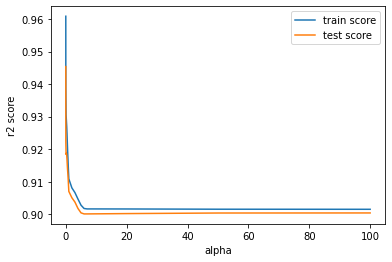

In [388]:
#plot the scores
cv_out['param_alpha'] = cv_out['param_alpha'].astype('float')
plt.plot(cv_out['param_alpha'], cv_out['mean_train_score'])
plt.plot(cv_out['param_alpha'], cv_out['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.legend(['train score', 'test score'])
plt.show()

In [389]:
print(model_rdg.best_params_)
print(model_rdg.best_score_)

{'alpha': 0.001}
0.9453691306368561


#### Using Lasso and GridSearchCV, we get the optimal alpha as 0.001. Lets build our final model using Lasso with alpha as 0.001


In [391]:
# Making Model Using Lasso Regression
lasso = Lasso(alpha=0.001)
        
lasso.fit(x_train, y_train)

y_pred_l_train = lasso.predict(x_train)
y_pred_l_test = lasso.predict(x_test)

metric_la = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)

R2_Train : 0.9596087748081668
R2_Test : 0.9445230482701432
 
RSS_Train : 6.480545774432803
RSS_Test : 4.01396197643805
 
MSE_Train : 0.006347253451942021
MSE_Test : 0.009143421358628815


### R2 Scores for Lasso Model
* R2_Train : 95.96%
* R2_Test : 94.45%

In [397]:
#Lasso model parameters
model_params = list(lasso.coef_)
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = x_train.columns
cols = cols.insert(0, "constant")
fnl = list(zip(cols, model_params))

In [398]:
fnl

[('constant', 18.426),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.02),
 ('OverallCond', 0.026),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.022),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.013),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', 0.019),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.004),
 ('Fireplaces', 0.0),
 ('GarageCars', 0.007),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.0),
 ('YrSold', -0.004),
 ('SalePrice', 0.0),
 ('YearBuilt_age', -0.001),
 ('GarageYrBlt_age', 0.0),
 ('YearRemodAdd_age', -0.001),
 ('MSZoning_FV', 0.034),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.037),
 ('MSZoning_RM', -0.0),
 ('MSSubClass_30', -0.077),
 ('MSSubClass_40', -0.0),
 ('MSSubClass_45', -

#### Using Lasso regression, we have found the features that are most relevant. We select Lasso as our final model because:
Lasso does feature selection for us - in the final list, it has implicity made the coefficients of a few features as 0. Hence we get the most important features.

In [399]:
#List of all predictors with non zero co-efficients
for i in range(len(fnl)):
    if(fnl[i][1]!=0):
        print(fnl[i][0])

constant
OverallQual
OverallCond
BsmtFullBath
FullBath
HalfBath
BedroomAbvGr
TotRmsAbvGrd
GarageCars
YrSold
YearBuilt_age
YearRemodAdd_age
MSZoning_FV
MSZoning_RL
MSSubClass_30
MSSubClass_50
MSSubClass_70
MSSubClass_120
MSSubClass_160
Neighborhood_ClearCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_NAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_Somerst
Condition1_Norm
BldgType_Twnhs
RoofStyle_Hip
Exterior1st_MetalSd
Exterior1st_Plywood
Exterior1st_VinylSd
Exterior2nd_CmentBd
Exterior2nd_MetalSd
Exterior2nd_Plywood
MasVnrType_BrkFace
Foundation_PConc
Electrical_SBrkr
FireplaceQu_Gd
FireplaceQu_NA
FireplaceQu_TA
GarageType_Attchd
GarageType_NA
SaleCondition_Normal


### Selecting the top 5 features affecting House prices based on Lasso (alpha = 0.001):

#### Top 5 Features:
1. Neighborhood_Crawfor (0.025)
2. OverallQual (0.02)
3. BsmtFinType2_Unf (0.026)
4. GarageCars (0.024)
5. GarageType_Attchd (0.024)

In [400]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ri, name = 'Ridge Regression')
ls_metric = pd.Series(metric_la, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.974452,0.967836,0.959609
1,R2 Score (Test),0.943502,0.947092,0.944523
2,RSS (Train),4.099018,5.160547,6.480546
3,RSS (Test),4.087863,3.828103,4.013962
4,MSE (Train),0.004015,0.005054,0.006347
5,MSE (Test),0.009312,0.008720,0.009143


In [401]:
# Lets observe the changes in the coefficients after regularization
betas = pd.DataFrame(index=data_train.columns)
betas.rows = data_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [402]:
pd.set_option('display.max_rows', None)
betas.head(10)

,Linear,Ridge,Lasso
LotFrontage,0.000091,-1.406415e-04,-1.499904e-04
LotArea,0.000001,5.342170e-07,6.374072e-07
OverallQual,0.016177,1.892013e-02,2.007190e-02
OverallCond,0.024471,2.515969e-02,2.565351e-02
BsmtFinSF1,0.000022,3.282771e-06,1.731096e-05
BsmtFinSF2,0.000010,1.767487e-05,3.515865e-05
BsmtUnfSF,0.000001,-2.314272e-06,1.615499e-05
TotalBsmtSF,0.000033,1.864338e-05,1.048000e-05
1stFlrSF,0.000037,5.738807e-07,2.505529e-05
2ndFlrSF,-0.000024,-3.591298e-05,1.788296e-05


In [403]:
featuresUsedByLasso = list(betas[betas["Lasso"] != 0.0].index)
len(featuresUsedByLasso)

65

In [404]:
featuresUsedByRidge = list(betas[betas["Ridge"] != 0.0].index)
len(featuresUsedByRidge)

197

In [405]:
betas["Lasso"].sort_values()[:5]

MSSubClass_30          -0.077456
Neighborhood_IDOTRR    -0.049941
Neighborhood_NoRidge   -0.035755
FireplaceQu_NA         -0.029032
GarageType_NA          -0.024510
Name: Lasso, dtype: float64

In [408]:
betas["Lasso"].sort_values()[-5:]

OverallCond             0.025654
MSSubClass_70           0.026667
SaleCondition_Normal    0.027450
MSZoning_FV             0.034200
MSZoning_RL             0.036887
Name: Lasso, dtype: float64

In [406]:
betas["Ridge"].sort_values()[:5]

MSSubClass_30          -0.072682
Neighborhood_IDOTRR    -0.062563
Neighborhood_MeadowV   -0.061360
RoofMatl_WdShngl       -0.044744
Neighborhood_NoRidge   -0.042319
Name: Ridge, dtype: float64

In [407]:
betas["Ridge"].sort_values()[-5:]

Neighborhood_Crawfor    0.048092
MSSubClass_75           0.048956
Neighborhood_ClearCr    0.057825
MSZoning_RL             0.064949
MSZoning_FV             0.066870
Name: Ridge, dtype: float64

#### Q1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Optimal Value of alpha for Ridge and Lasso Regression:
- Optimal value of alpha for Ridge Regression : "6.0"
- Optimal value of alpha for Lasso Regression : "0.001"

In [409]:
# What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

ridge2x = Ridge(alpha=12)

ridge2x.fit(x_train, y_train)

y_pred_r_train = ridge2x.predict(x_train)
y_pred_r_test = ridge2x.predict(x_test)

metric_ri_2x = displayR2_RSS_MSE(y_pred_r_train, y_pred_r_test)


R2_Train : 0.9660832578586243
R2_Test : 0.9470033055589444
 
RSS_Train : 5.441751244804065
RSS_Test : 3.8345062179906524
 
MSE_Train : 0.005329824921453541
MSE_Test : 0.008734638309773696


In [410]:
lasso2x = Lasso(alpha=0.002)

lasso2x.fit(x_train, y_train)

y_pred_l_train = lasso2x.predict(x_train)
y_pred_l_test = lasso2x.predict(x_test)

metric_la_2x = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)

R2_Train : 0.9527493375026685
R2_Test : 0.9385743697439838
 
RSS_Train : 7.581104057426442
RSS_Test : 4.444370797930796
 
MSE_Train : 0.007425175374560668
MSE_Test : 0.010123851475924366


In [411]:
final_metric = pd.concat([final_metric, pd.Series(metric_ri_2x, name = 'Ridge 2x'), pd.Series(metric_la_2x, name = 'Lasso 2x')], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge 2x,Lasso 2x
0,R2 Score (Train),0.974452,0.967836,0.959609,0.966083,0.952749
1,R2 Score (Test),0.943502,0.947092,0.944523,0.947003,0.938574
2,RSS (Train),4.099018,5.160547,6.480546,5.441751,7.581104
3,RSS (Test),4.087863,3.828103,4.013962,3.834506,4.444371
4,MSE (Train),0.004015,0.005054,0.006347,0.005330,0.007425
5,MSE (Test),0.009312,0.008720,0.009143,0.008735,0.010124


In [412]:
# We observe that overall acuracy of a model in both Ridge and lasso regression decrease slighly.


In [413]:
# What will be the most important predictor variables after the change is implemented?
betas['Ridge2x'] = ridge2x.coef_
betas['Lasso2x'] = lasso2x.coef_


In [414]:
betas["Ridge2x"].sort_values()[-1:]

MSZoning_FV    0.044765
Name: Ridge2x, dtype: float64

In [415]:
betas["Ridge2x"].sort_values()[:1]

MSSubClass_30   -0.064167
Name: Ridge2x, dtype: float64

In [416]:
betas["Lasso2x"].sort_values()[-1:]

GarageType_Attchd    0.027067
Name: Lasso2x, dtype: float64

In [417]:
betas["Lasso2x"].sort_values()[:1]

MSSubClass_30   -0.056942
Name: Lasso2x, dtype: float64

### Whichever is far from zero that will be the most important variable. 
In our case, it is MSZoning_FV

### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [418]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge 2x,Lasso 2x
0,R2 Score (Train),0.974452,0.967836,0.959609,0.966083,0.952749
1,R2 Score (Test),0.943502,0.947092,0.944523,0.947003,0.938574
2,RSS (Train),4.099018,5.160547,6.480546,5.441751,7.581104
3,RSS (Test),4.087863,3.828103,4.013962,3.834506,4.444371
4,MSE (Train),0.004015,0.005054,0.006347,0.005330,0.007425
5,MSE (Test),0.009312,0.008720,0.009143,0.008735,0.010124


#### If take the closer look at the matrix table Ridge has slighly more accurate in both (Train and Test data), But lasso has feature elimination feature by doing coefficient zero. Means Lasso is take very less features to predict the data means its a more simpler model than ridge. So i will go with lasso regression if there no specific requirement from business that specific features should be there in the model.

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [419]:
betas["Lasso"].sort_values()[:5]

MSSubClass_30          -0.077456
Neighborhood_IDOTRR    -0.049941
Neighborhood_NoRidge   -0.035755
FireplaceQu_NA         -0.029032
GarageType_NA          -0.024510
Name: Lasso, dtype: float64

In [420]:
betas["Lasso"].sort_values()[-5:]

OverallCond             0.025654
MSSubClass_70           0.026667
SaleCondition_Normal    0.027450
MSZoning_FV             0.034200
MSZoning_RL             0.036887
Name: Lasso, dtype: float64

In [421]:
currentTop5var = ["MSZoning_RL","MSZoning_FV","SaleCondition_Normal","MSSubClass_70","OverallCond"]

In [422]:
updatedCols = list(set(list(x_train.columns)).difference(set(currentTop5var)))
len(updatedCols)

194

In [423]:
lassoQ3 = Lasso(alpha=0.0004)

lassoQ3.fit(x_train[updatedCols], y_train)

y_pred_l_train = lassoQ3.predict(x_train[updatedCols])
y_pred_l_test = lassoQ3.predict(x_test[updatedCols])

metric_la_Q3 = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)

R2_Train : 0.9606773677231477
R2_Test : 0.9407401599765158
 
RSS_Train : 6.30909602843281
RSS_Test : 4.287667890304274
 
MSE_Train : 0.0061793300964082375
MSE_Test : 0.00976689724442887


In [424]:
sol = pd.Series(lassoQ3.coef_,index=updatedCols)

In [425]:
sol.sort_values()[:5]

Neighborhood_MeadowV   -0.118369
MSSubClass_30          -0.108046
Neighborhood_IDOTRR    -0.103362
Neighborhood_BrDale    -0.072682
Neighborhood_NoRidge   -0.057107
dtype: float64

In [426]:
sol.sort_values()[-5:]

Exterior1st_BrkFace     0.029718
FireplaceQu_TA          0.032600
FireplaceQu_Gd          0.033419
Neighborhood_ClearCr    0.041957
Neighborhood_Crawfor    0.042273
dtype: float64

#### According to above data after removing earier top 5 variables the current 5 most important variables are:
1. "Neighborhood_Crawfor"
2. "Neighborhood_ClearCr"
3. "FireplaceQu_Gd"
4. "FireplaceQu_TA"
5. "Exterior1st_BrkFace"

### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

### Robust can be achieve by decreasing bias and generalisation can be achieved by decreasing variance. Since bias and variance are inversely proportionate to each other we can achieve robustness and generalisation By balancing them, and we can do that by regularisation. 
### Implications are as follows : When there is a high varience and Low bias, model get overfitted and in overfited model we get high accuracy on training data (Seen Data) but very low accuracy on test data (Unseen Data) means there is huge difference between of train and test accuracy which result to failure of a model.